
## Question 1: What is Anomaly Detection?
Anomaly Detection is the process of identifying data points or patterns that deviate significantly from normal behavior.
### Types:
**Point Anomaly:** A single data point that is abnormal.
*Example:* A taxi fare of ₹50,000 for a 2 km ride.

**Contextual Anomaly:** An anomaly in a specific context.
*Example:* High electricity usage at midnight but normal during daytime.

**Collective Anomaly:** A group of related data points that are anomalous together.
*Example:* Continuous network traffic spike over several minutes.



## Question 2: Isolation Forest vs DBSCAN vs LOF
| Model | Approach | Best Use Case |
|------|---------|--------------|
| Isolation Forest | Random partitioning | Large datasets, high dimensions |
| DBSCAN | Density-based clustering | Spatial data |
| LOF | Local density comparison | Detecting local anomalies |



## Question 3: Components of Time Series
- **Trend:** Long-term direction (e.g., yearly sales growth)
- **Seasonality:** Repeating patterns (e.g., monthly demand)
- **Cyclic:** Long-term oscillations (e.g., economic cycles)
- **Irregular:** Random noise



## Question 4: Stationarity
A stationary series has constant mean, variance, and covariance.
### Tests:
- ADF Test
### Transformations:
- Differencing
- Log transform



## Question 5: AR vs MA vs ARIMA vs SARIMA vs SARIMAX
| Model | Description |
|-----|------------|
| AR | Past values |
| MA | Past errors |
| ARIMA | AR + MA + differencing |
| SARIMA | ARIMA + seasonality |
| SARIMAX | SARIMA + exogenous variables |


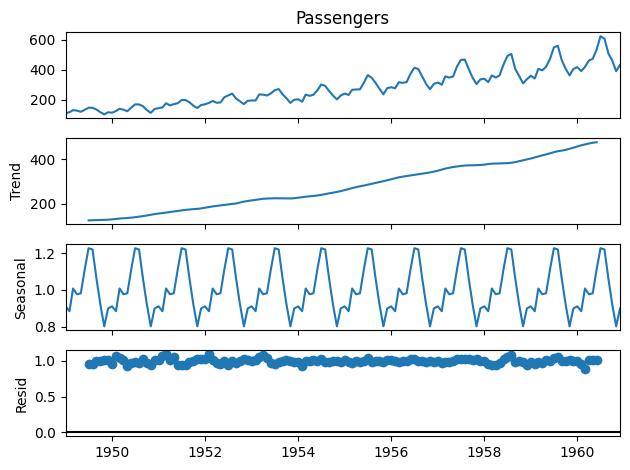

In [1]:

# Question 6: AirPassengers Decomposition
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

result = seasonal_decompose(data['Passengers'], model='multiplicative')
result.plot()
plt.show()


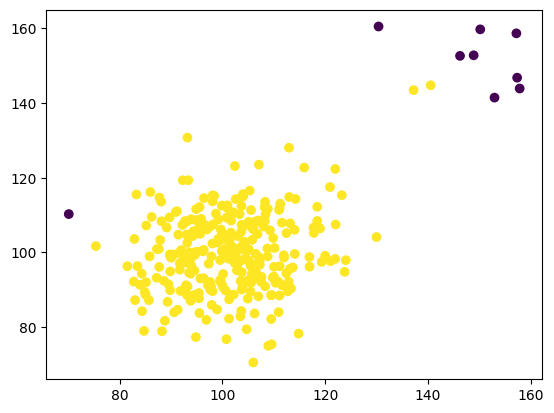

In [2]:

# Question 7: Isolation Forest on Synthetic Taxi Data
from sklearn.ensemble import IsolationForest
import numpy as np

X = np.random.normal(100, 10, (300, 2))
X[:10] += 50

model = IsolationForest(contamination=0.03)
y_pred = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


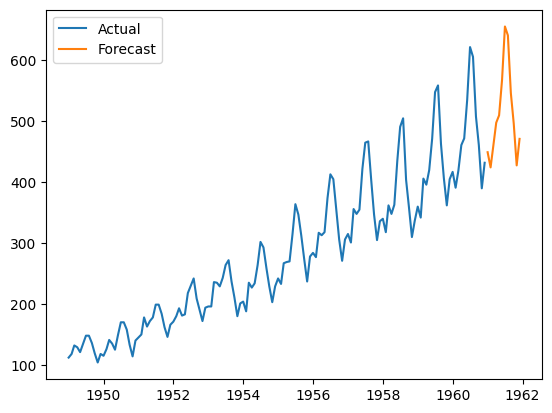

In [3]:

# Question 8: SARIMA Forecast
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
fit = model.fit(disp=False)

forecast = fit.forecast(12)
plt.plot(data['Passengers'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


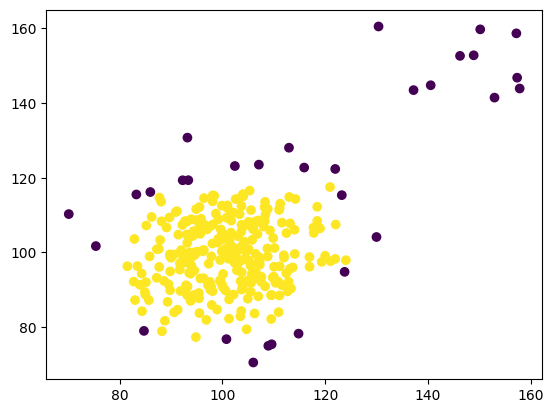

In [4]:

# Question 9: Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()



## Question 10: Real-Time Power Grid Workflow
### Anomaly Detection:
- Isolation Forest for streaming
### Forecasting:
- SARIMAX (weather as exogenous)
### Monitoring:
- Rolling RMSE, Drift detection
### Business Impact:
- Prevent outages
- Optimize load balancing
